## **Import dataset**
---

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv("/content/sample_data/phq_all_final.csv")
# Review the dataset
df.head()
# First column: the time the measurement was made
# Second column: the id of the patient submitting the assessment
# Third column: the type of assessment submitted
# Fourth column: the date that the patient was created
# Fifth column: the final score of the assessment

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


## **Data Cleaning & Exploration**
---
In this section, I will conduct a quick analysis on the dataset to have a big picture of what's going on in the table. Descriptive statistics and some quick visualizations will be included. Further insights are not included in this section.

In [3]:
# Quick glimpse into the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


The first thing that I notice is how clean the data is! All of the data are non-null values which is a good start. I will try to eliminate the duplicates in the next step.

In [4]:
# Drop duplicates
df.drop_duplicates()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9
...,...,...,...,...,...
53693,2020-07-31T13:59:13.201741,10683,gad7,2020-07-31T13:54:20.164253,1
53694,2020-07-31T15:08:56.079027,12344,gad7,2020-07-31T15:06:51.04373,1
53695,2020-07-31T15:52:50.353265,17475,gad7,2020-07-31T15:40:07.726529,7
53696,2020-07-31T17:36:57.057913,9069,gad7,2020-07-31T17:33:27.096572,3


No duplicates at all which is perfect. The next step will be checking if any of the records are not from GAD-7 assessments.

In [62]:
for n, test_type in enumerate(df['type'].tolist()):
    if test_type != 'gad7'.lower(): 
        print(df[n])

Seems like all of the records are from GAD-7 assessments. The next step will include some quick visualizations on the data based on various "grouped by" approaches.

### **Grouped by 'date'**
I want to see how many assessments have been taken throughout the timeline given by the dataset.

In [52]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

In [10]:
# Count the assesssments by date
assess_count = df.groupby(['date']).size().reset_index(name="Assessments Count")
# Check the new dataframe
assess_count.head()

,date,Assessments Count
0,2019-06-06,1
1,2019-06-07,2
2,2019-06-09,2
3,2019-06-10,6
4,2019-06-11,1


Looking good. Next, I will separate the dataframe into two smaller ones with one containing assessments counts of 2019 and the other one containing those of 2020. 

In [27]:
# Create a list of rows in 2019
data_2019 = [date for date in assess_count['date'].values if date.year==2019]
# Create a list of rows in 2020
data_2020 = [date for date in assess_count['date'].values if date.year==2020]
# Slice the dataframe into two
assess_count_2019 = assess_count[assess_count['date'].isin(data_2019)]
assess_count_2020 = assess_count[assess_count['date'].isin(data_2020)]
# Check the new dataframes' information
print(assess_count_2019.info())
print(assess_count_2020.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               208 non-null    object
 1   Assessments Count  208 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 208 to 420
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               213 non-null    object
 1   Assessments Count  213 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB
None


Now let's visualize it.

<Figure size 432x288 with 0 Axes>

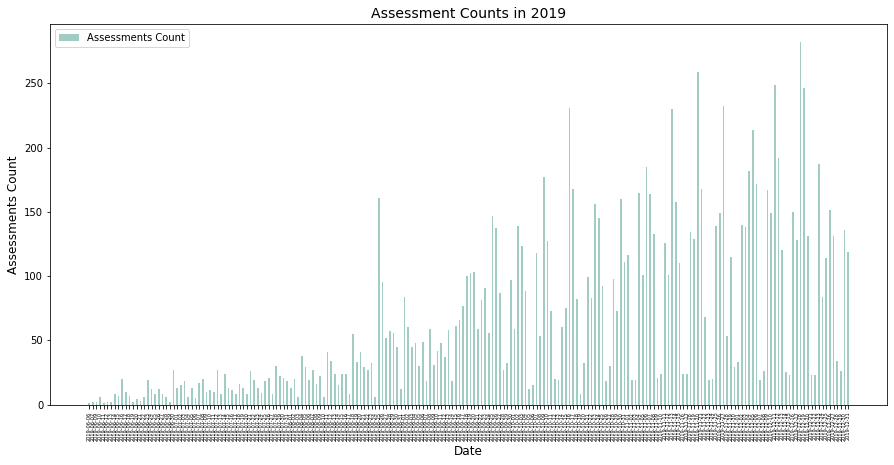

In [64]:
# Plotting 2019
fig = plt.figure()
ax = assess_count_2019.plot.bar(
    x="date", y="Assessments Count", color="#A1CCC3",
    figsize=(15,7), label="Assessments Count"
    ) 
ax.set_xticklabels(assess_count_2019["date"], rotation=90, size=5)
# Setting labels 
ax.set_title("Assessment Counts in 2019", size=14)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Assessments Count", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

<Figure size 432x288 with 0 Axes>

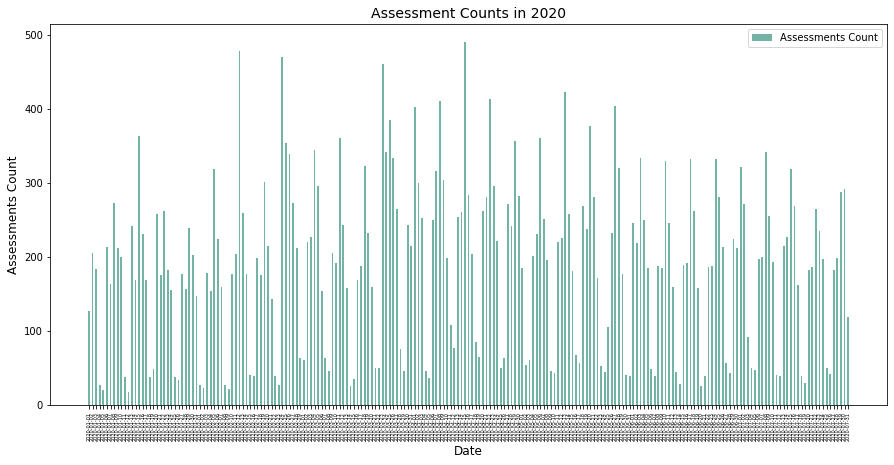

In [65]:
# Plotting 2020
fig = plt.figure()
ax = assess_count_2020.plot.bar(
    x="date", y="Assessments Count", color='#72B3A5',
    figsize=(15,7), label="Assessments Count"
    )
ax.set_xticklabels(assess_count_2020["date"], rotation=90, size=5)
# Setting labels 
ax.set_title("Assessment Counts in 2020", size=14)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Assessments Count", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

Looking at the two charts, even though it is still quite difficult to extract meaningful patterns, it is obvious that the number of assessments taken in the later half of 2019 is a lot smaller than that in the first half of 2020. The year 2020 has a more consistent number of assessments taken through out the first 7 months with a peak at nearly 500 assessments done in the middle of April. There can be many reasons behind these numbers such as:


*   More individual patients took the test in 2020.
*   There are patients retaking the test multiple times in a day.
*   The GAD-7 test has gone through the "testing phase" and was introduced to a majority of the available patients.
*   The test was made "easier" which increased accessibility.

These are all hypotheses that need to be tested. I will try to test as many hypotheses as possible during the following analysis.

Before moving on to another "grouped by" section, I still want to do one little further exploration via a visualization of monthly assessment counts from June 2019 to July 2020.

In [7]:
import calendar

# Create a copy of the original dataframe
temp_df = df.copy()
# Extract year and month
temp_df['year'] = pd.DatetimeIndex(temp_df['date']).year
temp_df['month'] = pd.DatetimeIndex(temp_df['date']).month
# Convert to month name
temp_df['month name'] = temp_df['month'].apply(lambda x: calendar.month_abbr[x])
# Create a new "Month Year" column
temp_df['Month Year'] = temp_df['month name'] + ' ' + temp_df['year'].astype('str')
# Create a new dataframe containing assessment counts per month, year. 
assess_count_month = temp_df.groupby(
    ['Month Year', 'month', 'year']).size().reset_index(name="Assessments Count"
    )
# Sort values by year then month
assess_count_month = assess_count_month.sort_values(['year', 'month'])

assess_count_month = assess_count_month.reset_index(drop=True)
# Check the new dataframe
assess_count_month

del temp_df

,Month Year,month,year,Assessments Count
0,Jun 2019,6,2019,177
1,Jul 2019,7,2019,471
2,Aug 2019,8,2019,1067
3,Sep 2019,9,2019,1950
4,Oct 2019,10,2019,2744
5,Nov 2019,11,2019,3234
6,Dec 2019,12,2019,3814
7,Jan 2020,1,2020,4953
8,Feb 2020,2,2020,5304
9,Mar 2020,3,2020,6158


<Figure size 432x288 with 0 Axes>

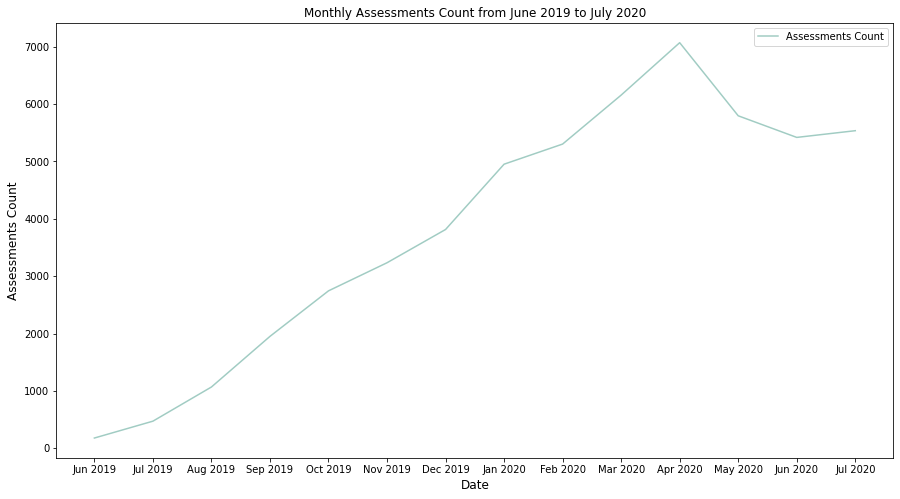

In [145]:
# Plotting
fig = plt.figure()
ax = assess_count_month.plot(
    x='Month Year', y="Assessments Count", color='#A1CCC3', figsize=(15,8)
    )
ax.set_xticks([i for i in range(0, len(assess_count_month["Month Year"].values))])
ax.set_xticklabels(assess_count_month["Month Year"])
ax.set_title("Monthly Assessments Count from June 2019 to July 2020")
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Assessments Count", size=12)
ax.autoscale(tight=False)
plt.show()

It is much clearer looking at this line chart. The chart shows that the number of monthly assessments taken increased gradually for 10 months straight from June 2019 before peaked at April 2020 with over 7000 assessments taken in that month. However, May 2020 witnessed a sharp fall in the count to under 6000. This number stayed about the same in the last two months of the period. The sharp increase in the first three months of 2020 is possibly due to the influence of Covid-19 pandemic as the country reported its first cases during this period.

### **Grouped by 'patient_id'**
The next approach is to group by 'patient_id' to examine their patterns of taking the GAD-7 assessment throughout the period. Hopefully, I can get some more insights from this.

First, let's see how many individual patients are included in this dataset.

In [72]:
print(f"The number of unique patients: {len(np.unique(df['patient_id']))}")

The number of unique patients: 15502


Let's check the frequency of these unique patients appearing in the dataset. In other words, let's see how many times each patient took the assessment.

In [103]:
patient_count = df.groupby(['patient_id']).size().reset_index(name="times_taken")
# Sort the values in descending order
patient_count.sort_values(by=['times_taken'], ascending=False, inplace=True)
patient_count.reset_index(drop=True, inplace=True)
patient_count.head(20)

,patient_id,times_taken
0,10687,84
1,6574,42
2,12307,38
3,13874,34
4,13855,34
5,14779,33
6,11538,32
7,1939,31
8,5670,28
9,1867,28


In [102]:
print("Percentage of patients taking the test only once:")
print(round(patient_count[patient_count == 1].sum(axis=0)['times_taken']/patient_count.shape[0]*100, 2), "%")

Percentage of patients taking the test only once:
29.65 %


Nearly 30% of the total number of patients only one chance to take the assessment. This observation can be due to various reasons including:

*   A number of patients were in the "testing phase".
*   A number of patients were "cured" between the two assessments which means they no longer needed to take the assessment.
*   System flaws in tracking the number of tests taken by patients.
*   Human flaws in giving assessments to patients on time.
*   Some patients just didn't want to retake the assessments due to personal reasons.

Again, these are all hypotheses.










Before moving on to the next section, I want to discover the monthly total number of patients taking assessments. This is an effort to test one of the hypotheses mentioned in the ***Grouped by 'date'*** part where I suggest that the increased number of patients taking the test in 2020 is among the factors creating the rise of assessments count in 2020 compared to 2019.

First, let's create a dataframe containing a month-year column and another column listed out all the individual patients taking the tests in each month.

In [140]:
# Create a copy of the original dataframe
temp_df = df.copy()
# Extract year and month
temp_df['year'] = pd.DatetimeIndex(temp_df['date']).year
temp_df['month'] = pd.DatetimeIndex(temp_df['date']).month
# Convert to month name
temp_df['month name'] = temp_df['month'].apply(lambda x: calendar.month_abbr[x])
# Create a new "Month Year" column
temp_df['Month Year'] = temp_df['month name'] + ' ' + temp_df['year'].astype('str')
# Create a new dataframe containing patient counts per month, year. 
patient_month = temp_df.groupby(
    ['Month Year', 'month', 'year', 'patient_id']).size().reset_index(name='Patients Count'
    )
# Sort values by year then month
patient_month = patient_month.sort_values(['year', 'month'])

patient_month.reset_index(drop=True, inplace=True)
# Check the dataframe
patient_month

del temp_df

,Month Year,month,year,patient_id,Patients Count
0,Jun 2019,6,2019,15,1
1,Jun 2019,6,2019,365,1
2,Jun 2019,6,2019,571,1
3,Jun 2019,6,2019,610,1
4,Jun 2019,6,2019,789,1
...,...,...,...,...,...
44795,Jul 2020,7,2020,18388,1
44796,Jul 2020,7,2020,18390,1
44797,Jul 2020,7,2020,18395,1
44798,Jul 2020,7,2020,18396,1


Let's separate this dataframe into a 2019 table and a 2020 table. Also, I will count the total number of individual patients in each month.

In [141]:
patient_month = patient_month.groupby(['Month Year', 'month', 'year']).size().reset_index(name='Patients Count')
patient_month.sort_values(['year', 'month'], inplace=True)
# 2019
patient_count_2019 = patient_month[patient_month['year']==2019]
# 2020
patient_count_2020 = patient_month[patient_month['year']==2020]

Now, let's visualize it.

<Figure size 432x288 with 0 Axes>

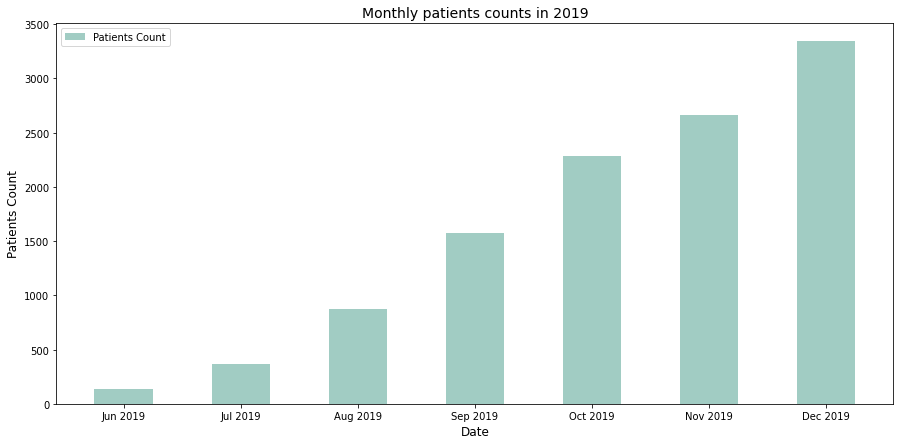

In [142]:
# Plotting 2019
fig = plt.figure()
ax = patient_count_2019.plot.bar(
    x="Month Year", y="Patients Count", color='#A1CCC3',
    figsize=(15,7), label="Patients Count"
    )
ax.set_xticklabels(patient_count_2019["Month Year"], rotation=0)
# Setting labels 
ax.set_title("Monthly patients counts in 2019", size=14)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Patients Count", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

<Figure size 432x288 with 0 Axes>

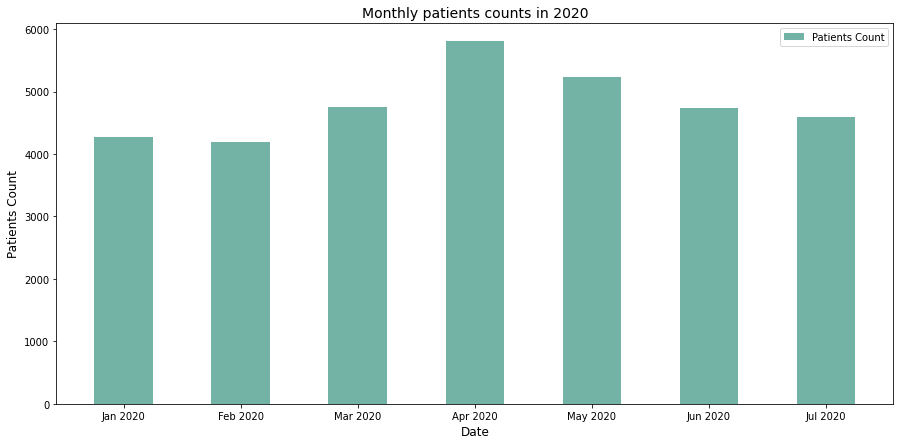

In [143]:
# Plotting 2020
fig = plt.figure()
ax = patient_count_2020.plot.bar(
    x="Month Year", y="Patients Count", color='#72B3A5',
    figsize=(15,7), label="Patients Count"
    )
ax.set_xticklabels(patient_count_2020["Month Year"], rotation=0)
# Setting labels 
ax.set_title("Monthly patients counts in 2020", size=14)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Patients Count", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

Put that all together, we have...

<Figure size 432x288 with 0 Axes>

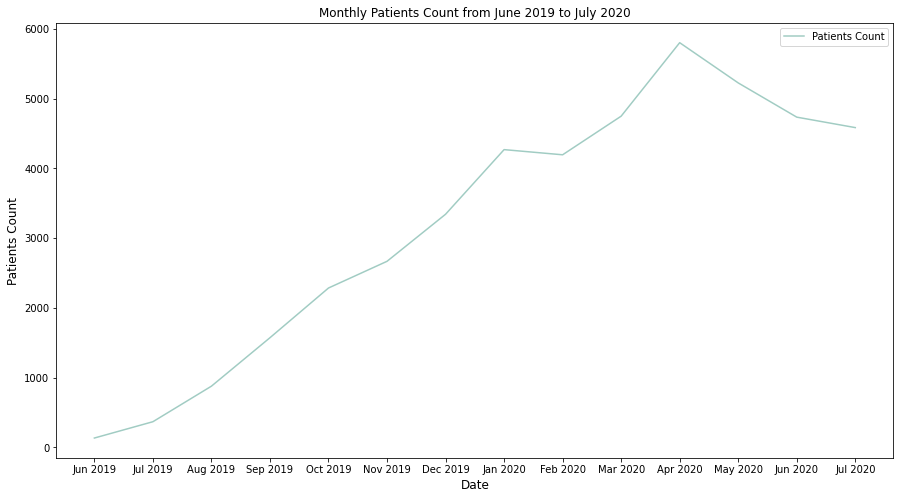

In [144]:
# Plotting
fig = plt.figure()
ax = patient_month.plot(
    x='Month Year', y="Patients Count", color='#A1CCC3', figsize=(15,8)
    )
ax.set_xticks([i for i in range(0, len(patient_month["Month Year"].values))])
ax.set_xticklabels(patient_month["Month Year"])
ax.set_title("Monthly Patients Count from June 2019 to July 2020")
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Patients Count", size=12)
ax.autoscale(tight=False)
plt.show()

There is an incredible resemblance between this chart and the ***Monthly Assessments Count from June 2019 to July 2020*** chart. The hypothesis is, therefore, confirmed. Further analysis is necessary to test the rest of the hypotheses, however, I decide to leave them out of the scope of this project because of the time constraint.

### **Grouped by 'score'**
Finally, let's look at the most interesting and meaningful attribute: *'score'*. This is the column that will be used to identify the patients who will need further clinical evaluation. There are a lot of approaches we can take from here to analyze this attribute. The approaches that need to be prioritized are the ones that align perfectly with the desired outcome of the business problem which should be planned out before looking at the data. This requires feedbacks from the mental health providers and their patients on what kinds of information they expect to get from the assessments. Unfortunately, the scope of this take-home project doesn't allow me to get access to such valuable information. As the result, I will conduct two quick analysis that I believe are helpful, at least at some levels, to both the mental health providers and the patients.

The first analysis will simply show a statiscal view of the percentage of assessment results falling into the 'red zone' - a phrase that I come up with myself to categorize the people who turned out to require extra clinical evaluation after taking the assessment - throughout the period. The second analysis will be my effort to track the scores of the top 3 patients with the highest test-taking frequency based on the *patient_count* dataframe that I have created in the ***Grouped by 'patient_id'*** section.

#### First approach
Considering the fact that a patient's status can move back and forth between the 'red zone' and the 'safe zone' - another term that I come up with, basically the opposite of 'red zone' in a short time frame, I won't try to produce a statical view on the **number of patients** falling into the 'red zone'. Instead of that, I will visualize the percentage of **assessment results** falling into the two pre-defined zones. This approach, in a way, neglects the influence of the individuality of the patients, but that is the ultimate purpose - to simplify the analysis. In other words, let's assume that no one took the assessment more than once in a single month.

First, let's do a little data preprocessing by replacing the raw scores with categorical values. There are two ways of doing this. I will map the raw scores to 'safe_zone' and 'red_zone', and I will map the raw scores to the severity labels: 'low_to_minimal', 'mild', 'moderate', and 'severe'. These two ways will serve two different purposes.

In [4]:
# 'safe_zone' and 'red_zone' mapping
df_two = df.copy()
df_two['score'] = df_two['score'].map({
    0:'safe_zone', 1:'safe_zone', 2:'safe_zone', 3:'safe_zone',
    4:'safe_zone', 5:'safe_zone', 6:'safe_zone', 7:'safe_zone',
    8:'safe_zone', 9:'safe_zone', 10:'red_zone', 11:'red_zone',
    12:'red_zone', 13:'red_zone', 14:'red_zone', 15:'red_zone',
    16:'red_zone', 17:'red_zone', 18:'red_zone', 19:'red_zone',
    20:'red_zone', 21:'red_zone'
})
# Check the new dataframe
df_two

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,safe_zone
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,safe_zone
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,red_zone
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,safe_zone
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,safe_zone
...,...,...,...,...,...
53693,2020-07-31T13:59:13.201741,10683,gad7,2020-07-31T13:54:20.164253,safe_zone
53694,2020-07-31T15:08:56.079027,12344,gad7,2020-07-31T15:06:51.04373,safe_zone
53695,2020-07-31T15:52:50.353265,17475,gad7,2020-07-31T15:40:07.726529,safe_zone
53696,2020-07-31T17:36:57.057913,9069,gad7,2020-07-31T17:33:27.096572,safe_zone


In [5]:
# Severity labels
df_four = df.copy()
df_four['score'] = df_four['score'].map({
    0:'low_to_minimal', 1:'low_to_minimal', 2:'low_to_minimal', 3:'low_to_minimal',
    4:'low_to_minimal', 5:'low_to_minimal', 6:'mild', 7:'mild',
    8:'mild', 9:'mild', 10:'mild', 11:'moderate',
    12:'moderate', 13:'moderate', 14:'moderate', 15:'moderate',
    16:'severe', 17:'severe', 18:'severe', 19:'severe',
    20:'severe', 21:'severe'
})
# Check the new dataframe
df_four

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,mild
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,low_to_minimal
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,mild
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,mild
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,mild
...,...,...,...,...,...
53693,2020-07-31T13:59:13.201741,10683,gad7,2020-07-31T13:54:20.164253,low_to_minimal
53694,2020-07-31T15:08:56.079027,12344,gad7,2020-07-31T15:06:51.04373,low_to_minimal
53695,2020-07-31T15:52:50.353265,17475,gad7,2020-07-31T15:40:07.726529,mild
53696,2020-07-31T17:36:57.057913,9069,gad7,2020-07-31T17:33:27.096572,low_to_minimal


Let's deal with *df_two* first. With this dataframe, I will redo the groupby process that I have done earlier with *'patient id'* to get the monthly counts of records in each of the zone.

In [17]:
# Extract year and month
df_two['year'] = pd.DatetimeIndex(df_two['date']).year
df_two['month'] = pd.DatetimeIndex(df_two['date']).month
# Convert to month name
df_two['month name'] = df_two['month'].apply(lambda x: calendar.month_abbr[x])
# Create a new "Month Year" column
df_two['Month Year'] = df_two['month name'] + ' ' + df_two['year'].astype('str')
# Create a new dataframe containing zones counts per month, year. 
zone_month = df_two.groupby(
    ['Month Year', 'month', 'year', 'score']).size().reset_index(name='Zones Count')
# Sort values by year then month
zone_month = zone_month.sort_values(['year', 'month'])

zone_month.reset_index(drop=True, inplace=True)
# Check the dataframe
zone_month

,Month Year,month,year,score,Zones Count
0,Jun 2019,6,2019,red_zone,75
1,Jun 2019,6,2019,safe_zone,102
2,Jul 2019,7,2019,red_zone,117
3,Jul 2019,7,2019,safe_zone,354
4,Aug 2019,8,2019,red_zone,299
5,Aug 2019,8,2019,safe_zone,768
6,Sep 2019,9,2019,red_zone,497
7,Sep 2019,9,2019,safe_zone,1453
8,Oct 2019,10,2019,red_zone,554
9,Oct 2019,10,2019,safe_zone,2190


After that, let's again separate the dataframe into two familiar smaller ones: 2019 and 2020.

In [32]:
# 2019
zones_count_2019 = zone_month[zone_month['year']==2019]
safe_count_2019 = zones_count_2019[zones_count_2019['score']=='safe_zone']
red_count_2019 = zones_count_2019[zones_count_2019['score']=='red_zone']
# 2020
zones_count_2020 = zone_month[zone_month['year']==2020]
safe_count_2020 = zones_count_2020[zones_count_2020['score']=='safe_zone']
red_count_2020 = zones_count_2020[zones_count_2020['score']=='red_zone']

Now, comes the visualization part.

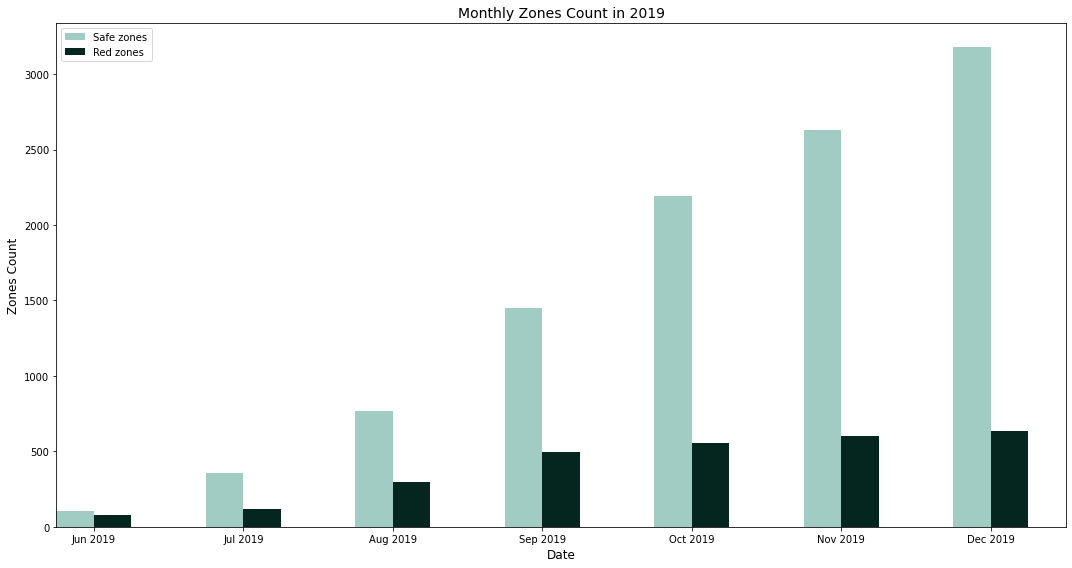

In [191]:
# Plotting 2019

fig, ax = plt.subplots(1,1, figsize=(15,8))
# Set the bar width
width = 0.25

# Plotting for each axes
safe_count_2019.plot.bar(x="Month Year", y="Zones Count", color="#A1CCC3", 
                         ax=ax, width=width, position=1, label="Safe zones"
                         )
red_count_2019.plot.bar(x="Month Year", y="Zones Count", color="#05261e", 
                        ax=ax, width=width, position=0, label="Red zones"
                        )
ax.set_xticklabels(safe_count_2019["Month Year"], rotation=0) 
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Zones Count", size=12)
ax.set_title("Monthly Zones Count in 2019", size=14)
ax.set_ylabel("Zones Count", size=12)
ax.legend(loc='upper left')
fig.tight_layout()
plt.show()

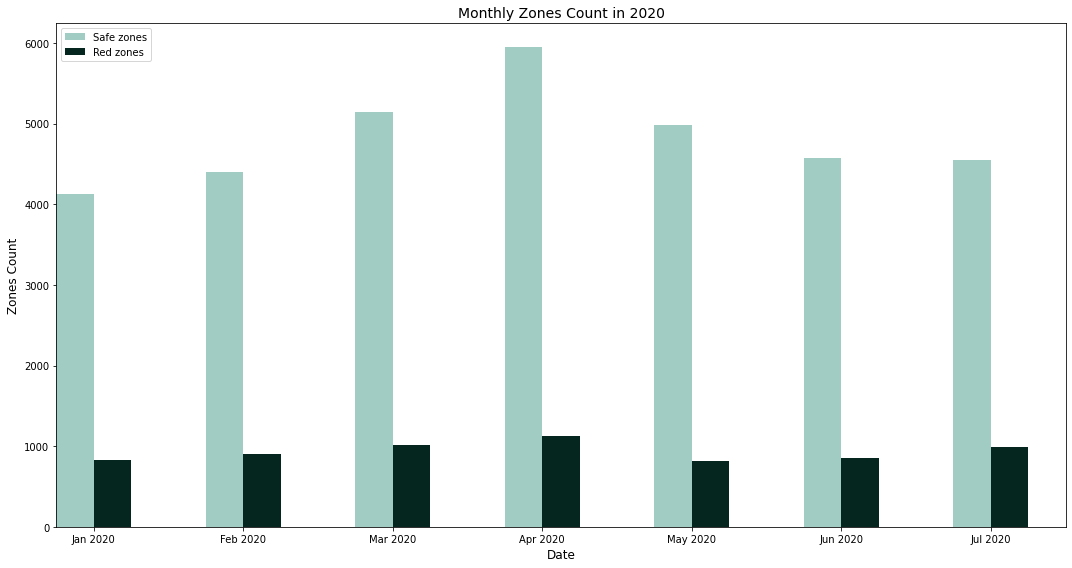

In [192]:
# Plotting 2020

fig, ax = plt.subplots(1,1, figsize=(15,8))
# Set the bar width
width = 0.25

# Plotting for each axes
safe_count_2020.plot.bar(x="Month Year", y="Zones Count", color="#A1CCC3", 
                         ax=ax, width=width, position=1, label="Safe zones"
                         )
red_count_2020.plot.bar(x="Month Year", y="Zones Count", color="#05261e", 
                        ax=ax, width=width, position=0, label="Red zones"
                        )
ax.set_xticklabels(safe_count_2020["Month Year"], rotation=0) 
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Zones Count", size=12)
ax.set_title("Monthly Zones Count in 2020", size=14)
ax.set_ylabel("Zones Count", size=12)
ax.legend(loc='upper left')
fig.tight_layout()
plt.show()

I will provide a stacked bar graph to display the percentage of the proportion of 'safe_zone' and 'red_zone' more efficiently. Before plotting, I need to make a few transformation to the *zone_month* dataframe.

In [35]:
# Make 'safe_zone' and 'red_zone' two columns instead of categorical values
zone_pivot = zone_month.pivot(
    index=['year', 'month']
    , columns='score', values='Zones Count'
    )
zone_pivot.sort_index(inplace=True)
# Add the 'Month Year' column to the new pivoted dataframe
zone_pivot.insert(
    0, 'Month Year', 
    safe_count_2019['Month Year'].values.tolist() + safe_count_2020['Month Year'].values.tolist()
    )
# Check the dataframe
zone_pivot

score      Month Year  red_zone  safe_zone
year month                                
2019 6       Jun 2019        75        102
     7       Jul 2019       117        354
     8       Aug 2019       299        768
     9       Sep 2019       497       1453
     10      Oct 2019       554       2190
     11      Nov 2019       605       2629
     12      Dec 2019       637       3177
2020 1       Jan 2020       827       4126
     2       Feb 2020       901       4403
     3       Mar 2020      1009       5149
     4       Apr 2020      1126       5946
     5       May 2020       812       4985
     6       Jun 2020       848       4572
     7       Jul 2020       994       4543

Now, I will convert the counts to percentages.

In [37]:
cols = ['red_zone', 'safe_zone']
zone_pivot[cols] = zone_pivot[cols].div(zone_pivot[cols].sum(axis=1), axis=0).multiply(100)
# Check the dataframe
zone_pivot

score      Month Year   red_zone  safe_zone
year month                                 
2019 6       Jun 2019  42.372881  57.627119
     7       Jul 2019  24.840764  75.159236
     8       Aug 2019  28.022493  71.977507
     9       Sep 2019  25.487179  74.512821
     10      Oct 2019  20.189504  79.810496
     11      Nov 2019  18.707483  81.292517
     12      Dec 2019  16.701626  83.298374
2020 1       Jan 2020  16.696951  83.303049
     2       Feb 2020  16.987179  83.012821
     3       Mar 2020  16.385190  83.614810
     4       Apr 2020  15.921946  84.078054
     5       May 2020  14.007245  85.992755
     6       Jun 2020  15.645756  84.354244
     7       Jul 2020  17.951960  82.048040

The final step is to plot it out on a stacked bar graph!

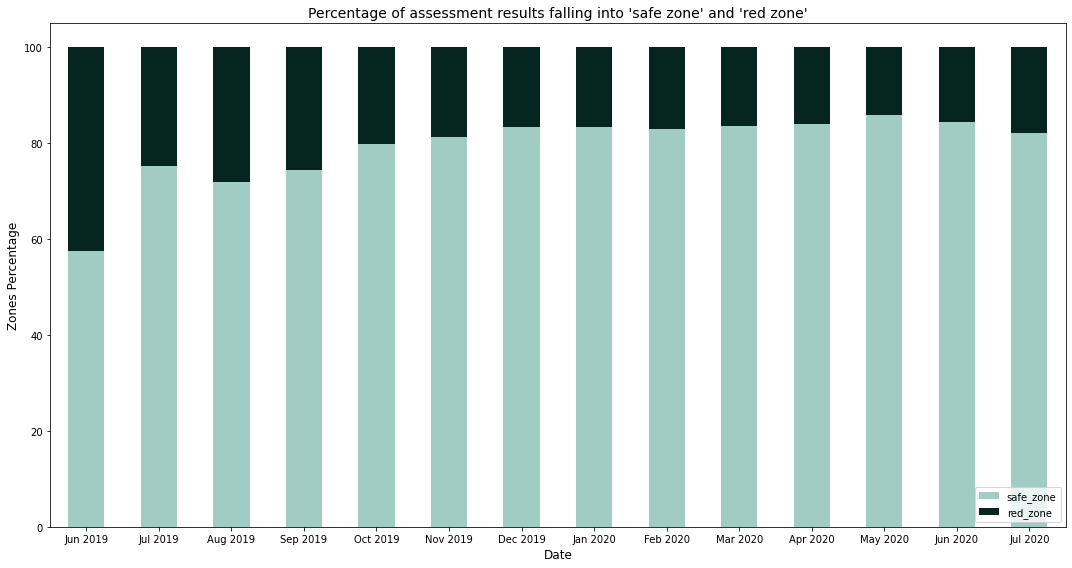

In [47]:
# Plotting
fig, ax = plt.subplots(1,1, figsize=(15,8))
colors = ['#A1CCC3','#05261e']
zone_pivot.loc[:,['safe_zone', 'red_zone']].plot.bar(stacked=True, color=colors, 
                                                     ax=ax)
ax.set_title("Percentage of assessment results falling into 'safe zone' and 'red zone'", 
          size=14)
ax.set_xticklabels(zone_pivot['Month Year'], rotation=0)
ax.set_ylabel("Zones Percentage", size=12)
ax.set_xlabel("Date", size=12)
ax.legend(loc='lower right')
fig.tight_layout()
plt.show()

The pattern is quite interesting here. More than 40% of the results coming in June 2019 fell into the 'red zone'. This number gradually dropped in the last six months of 2019. In December 2019, there was only about 15% of the results were in the 'red zone'. This low percentage didn't fluctuate too much during the firs half of 2020. Even in April 2020 when the number of assessments taken reached the highest, the proportion of 'red zone' was the same as that four months earlier. I think that 15%-20% can be a useful benchmark for mental health providers to track the overall status of all the assessments taken month by month. For example, if the percentage suddenly rises up to over 20%, the health providers will need to be alerted to the potential factors that cause the sudden rise in order to take on time actions.

There is nothing we can say about the patients' status according to this graph, though. This is why we need the second analysis.

#### Second approach
The second analysis will track the scores of the top 3 patients with the highest test-taking frequency based on the *patient_count* dataframe that I have created in the ***Grouped by 'patient_id'*** section. This analysis should be helpful for mental health providers to track a specific patient's status throughout a specific time frame. The patient himself/herself will also find the tracking results very helpful to monitor their own mental health status.

The top 3 patients ID are: 10687, 6574, 12307. Firstly, I will extract the records of these three patients from the original dataframe.

In [127]:
# Function that reformat the 'date' column
def convert_date(x):
    '''
    Input: raw datetime object
    Output: reformatted datetime object
    Example: 2019-08-26T13:32:43.019162	-> 2019-08-26 13:32:43
    '''
    x = x.replace('T', ' ')[:19]
    return x

def convert_date_hms(x):
    '''
    Input: raw datetime object
    Output: reformatted datetime object
    Example: 2019-08-26T13:32:43.019162	-> 2019-08-26
    '''
    x = x.replace('T', ' ')[:10]
    return x

# Reimport the dataset to reconvert the datetime
df = pd.read_csv("/content/sample_data/phq_all_final.csv")
df['date'] = df['date'].apply(convert_date)
df['date_hms'] = df['date'].apply(convert_date_hms)

# Extract the patients data
patient_10687 = df[df['patient_id']==10687]
patient_6574 = df[df['patient_id']==6574]
patient_12307 = df[df['patient_id']==12307]

# Reset index
patient_10687.reset_index(drop=True, inplace=True)
patient_6574.reset_index(drop=True, inplace=True)
patient_12307.reset_index(drop=True, inplace=True)

In [128]:
# Check one dataframe
patient_10687

,date,patient_id,type,patient_date_created,score,date_hms
0,2019-06-18 13:18:43,10687,gad7,2019-06-12T16:32:01.993418,13,2019-06-18
1,2019-06-20 06:01:13,10687,gad7,2019-06-12T16:32:01.993418,12,2019-06-20
2,2019-06-22 13:32:11,10687,gad7,2019-06-12T16:32:01.993418,14,2019-06-22
3,2019-06-24 06:07:19,10687,gad7,2019-06-12T16:32:01.993418,15,2019-06-24
4,2019-06-26 05:54:12,10687,gad7,2019-06-12T16:32:01.993418,9,2019-06-26
...,...,...,...,...,...,...
79,2019-11-21 10:32:27,10687,gad7,2019-06-12T16:32:01.993418,18,2019-11-21
80,2019-11-21 10:32:46,10687,gad7,2019-06-12T16:32:01.993418,18,2019-11-21
81,2019-11-25 10:52:01,10687,gad7,2019-06-12T16:32:01.993418,20,2019-11-25
82,2019-11-27 10:40:38,10687,gad7,2019-06-12T16:32:01.993418,20,2019-11-27


The 'date' column looks good. Now I will visualize the assessment scores on a timeline for the three patients.

<Figure size 432x288 with 0 Axes>

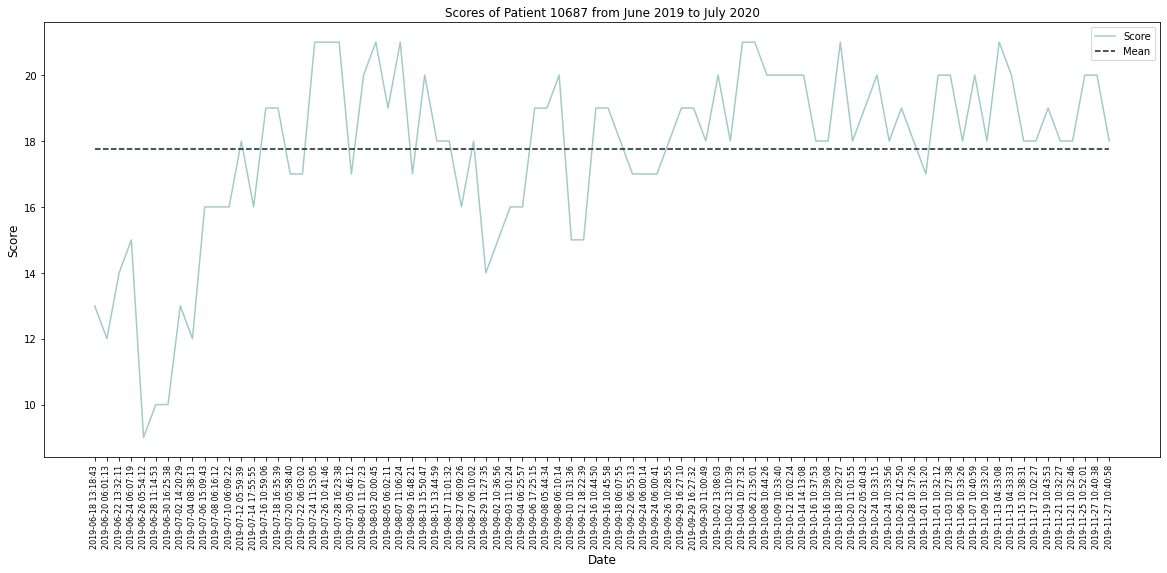

In [153]:
# Plotting patient 10687
fig = plt.figure()

# Calculate the simple average of the data
y_mean = [np.mean(patient_10687['score'])]*len(patient_10687)

ax = patient_10687.plot(
    x='date', y='score', color='#A1CCC3', figsize=(20,8), label='Score'
    )
mean_line = ax.plot(patient_10687['date'], y_mean, label='Mean', 
                    linestyle='--', color='#05261e')
ax.set_xticks([i for i in range(patient_10687.shape[0])])
ax.set_xticklabels(patient_10687["date"], rotation=90, size=8)
ax.set_title("Scores of Patient 10687 from June 2019 to July 2020")
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Score", size=12)
ax.legend(loc='upper right')
ax.autoscale(tight=False)
plt.show()

<Figure size 432x288 with 0 Axes>

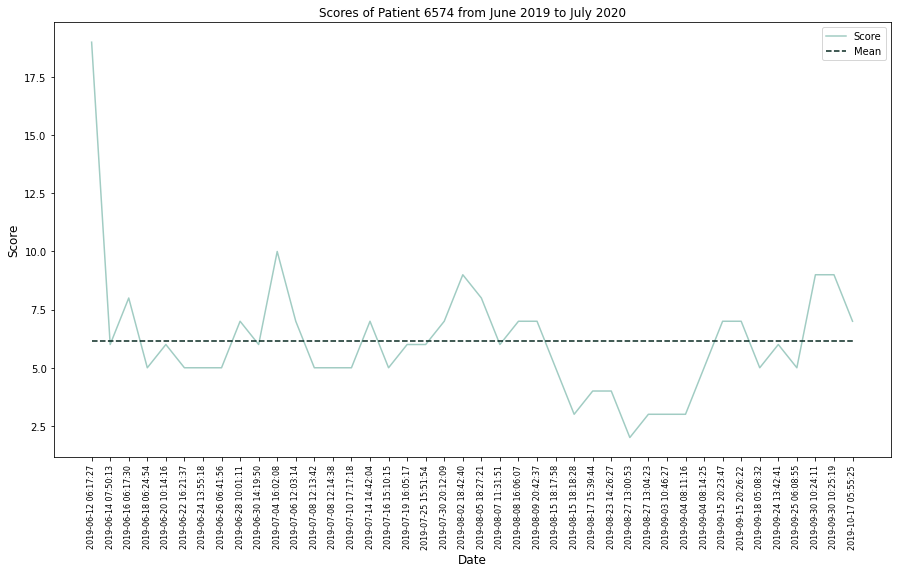

In [157]:
# Plotting patient 6574
fig = plt.figure()

# Calculate the simple average of the data
y_mean = [np.mean(patient_6574['score'])]*len(patient_6574)

ax = patient_6574.plot(
    x='date', y='score', color='#A1CCC3', figsize=(15,8), label='Score'
    )
mean_line = ax.plot(patient_6574['date'], y_mean, label='Mean', 
                    linestyle='--', color='#05261e')
ax.set_xticks([i for i in range(patient_6574.shape[0])])
ax.set_xticklabels(patient_6574["date"], rotation=90, size=8)
ax.set_title("Scores of Patient 6574 from June 2019 to July 2020")
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Score", size=12)
ax.legend(loc='upper right')
ax.autoscale(tight=False)
plt.show()

<Figure size 432x288 with 0 Axes>

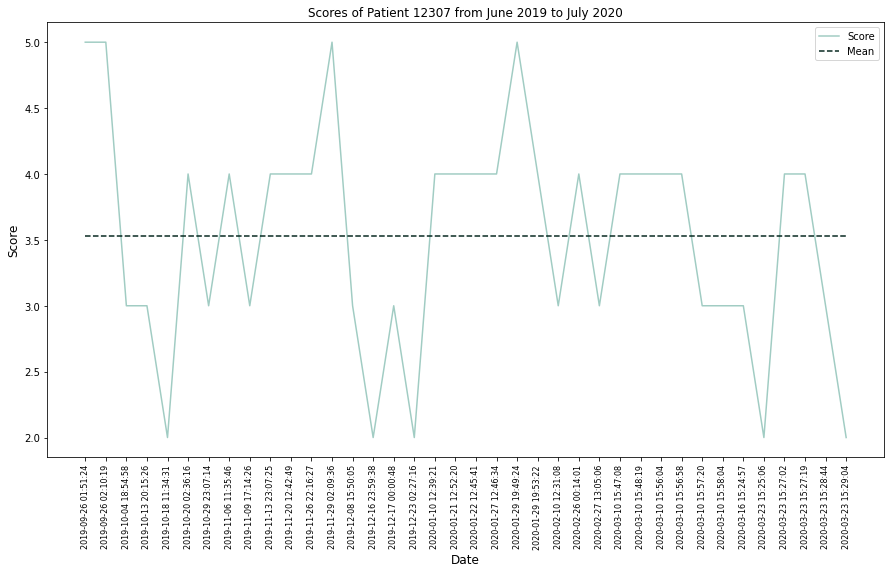

In [156]:
# Plotting patient 12307
fig = plt.figure()

# Calculate the simple average of the data
y_mean = [np.mean(patient_12307['score'])]*len(patient_12307)

ax = patient_12307.plot(
    x='date', y='score', color='#A1CCC3', figsize=(15,8), label='Score'
    )
mean_line = ax.plot(patient_12307['date'], y_mean, label='Mean', 
                    linestyle='--', color='#05261e')
ax.set_xticks([i for i in range(patient_12307.shape[0])])
ax.set_xticklabels(patient_12307["date"], rotation=90, size=8)
ax.set_title("Scores of Patient 12307 from June 2019 to July 2020")
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Score", size=12)
ax.legend(loc='upper right')
ax.autoscale(tight=False)
plt.show()

According to the charts, all of the three patients started taking their first assessment in 2019. Patient 10687 took his/her first test on June 18, 2010. Patient 6574 took his/her first test on June 12, 2019. Patient 12307 started on September 26, 2019, and he/she was the only one continued taking the assessment in 2020. The last test result of patient 10687 was recorded on November 27, 2019. That of patient 6574 was recorded on October 17, 2019.

With 84 records, patient 10687 showed a highly severe mental health status as his/her mean score was 18. There were times his/her score reached the highest score possible, 21. Patients like 10687 should be monitored carefully because the severity level didn't seem to improve through time. 10687's scores were above the average line for almost the last two months of his/her records which is an alert for the clinicians. Further data should be collected such as treatment methods for each patient in order to integrate the effectiveness of different treatment approaches.

Patient 6574 showed a huge improvement on his/her mental health status. It is interesting that it only took 2 days from June 12 to June 14, 2019 for the mental health providers to help 6574 drop his score from nearly 20 to 6. The mean score shows that patient 6574 was very well monitored and didn't seem to encounter any mental problem until October 17, 2019.

Patient 12307's mental health was really promising. All of his/her data were 5 or under which indicate a *Low to Minimal* severity level.

## **Conclusion**
---
Due to the time constraint of this project, I am sure that there are still a lot of uncovered insights hidden inside the data that I didn't have the time to explore. Nevertheless, I have found and shared some of the patterns that I consider, at some levels, useful for both the mental health providers and their patients. If I were to have more time and resource to work on the project, here are the things I want to achieve:

*   Run the tracking analysis on other patients.
*   Improve the tracking analysis with data sorted by user-input time frames.
*   Further investigate the reasons why patients like 10687 stopped taking the assessment even though his/her status was not improved.
*   Answer my declared hypotheses.
*   Further understand the desired output of the clinicians and the patients.
*   Communicate with both of the end-users to get their feedbacks on the effectiveness of the visualization and analysis.
*   More data on the patients' answers for each question on the GAD-7 assessment will be very helpful. This breaks down the tracking analysis into separated measurements. Mental health providers may find this kind of deep analysis more helpful as they can uncover specific sources of mental illness of their patients. Total scores only work as an indicator for labeling severity levels. 
*   Got a chance to take the GAD-7 assessment by myself. The complexity of the assessment has a great impact on the willingness and honesty of the patients when answering the questions.






